## Exploration des données 
Ici nous allons analyser les données.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

nodes_df = pd.read_csv('nodes_1927_to_1960.csv')
edges_df = pd.read_csv('edges_1927_to_1960.csv')

print(nodes_df.head())
print(edges_df.head())

          Id  category                   Label
0  nm0844752     actor  Rafael Sánchez Navarro
1  nm0194720     actor          Miguel Córcega
2  nm0529960  director       Eva López Sánchez
3  nm0561155     actor      Giovanni Mauriello
4  nm0269416     actor        Gianluca Favilla
      Source     Target      Label  Weight
0  nm0194720  nm0844752  tt0015724       1
1  nm0529960  nm0844752  tt0015724       1
2  nm0194720  nm0529960  tt0015724       1
3  nm0269416  nm0561155  tt0036606       1
4  nm0561155  nm0743027  tt0036606       1


In [31]:
# Supprimer les doublons dans les arêtes
edges_df.drop_duplicates(subset=['Source', 'Target'], inplace=True)

# Vérification de la cohérence entre les nœuds et les arêtes
valid_ids = set(nodes_df['Id'])
edges_df = edges_df[edges_df['Source'].isin(valid_ids) & edges_df['Target'].isin(valid_ids)]

KeyError: Index(['Destination'], dtype='object')

In [32]:
category_counts = nodes_df['category'].value_counts()
print("Répartition des catégories :")
print(category_counts)

Répartition des catégories :
category
actor       23113
writer      13240
director    10168
Name: count, dtype: int64


In [38]:
# Acteurs avec le plus de connexions
top_actors = edges_df['Target'].value_counts().head(10)
print("Les acteurs/réalisateurs/writers les plus présents :")
print(top_actors)

Les acteurs/réalisateurs les plus présents :
Target
nm0945189    172
nm0939147    162
nm0874676    131
nm0943138    122
nm0634159    112
nm0938944    111
nm0681566    109
nm0785664    106
nm0704719    101
nm0504899     98
Name: count, dtype: int64



Statistiques descriptives des poids des arêtes :
count    199818.000000
mean          1.085233
std           0.489966
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          42.000000
Name: Weight, dtype: float64


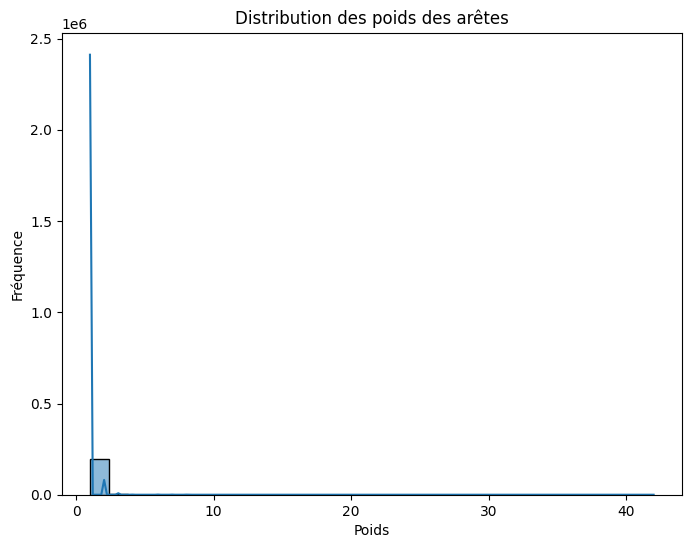

In [36]:
import seaborn as sns
weight_distribution = edges_df['Weight'].describe()
print("\nStatistiques descriptives des poids des arêtes :")
print(weight_distribution)

# Histogramme des poids des arêtes
plt.figure(figsize=(8,6))
sns.histplot(edges_df['Weight'], bins=30, kde=True)
plt.title('Distribution des poids des arêtes')
plt.xlabel('Poids')
plt.ylabel('Fréquence')
plt.show()

In [46]:
weight_list = edges_df['Weight'].value_counts()
print("Poids les plus fréquents :")
print(weight_list.head())

Poids les plus fréquents :
Weight
1    188719
2      8166
3      1708
4       582
5       276
Name: count, dtype: int64


ici on enlève les connexions avec un poids de 2

In [43]:
# Exemple : garder les relations les plus fréquentes (poids > 1)
filtered_edges_df = edges_df[edges_df['Weight'] > 2]


Statistiques descriptives des poids des arêtes :
count    2933.000000
mean        4.022503
std         2.220802
min         3.000000
25%         3.000000
50%         3.000000
75%         4.000000
max        42.000000
Name: Weight, dtype: float64


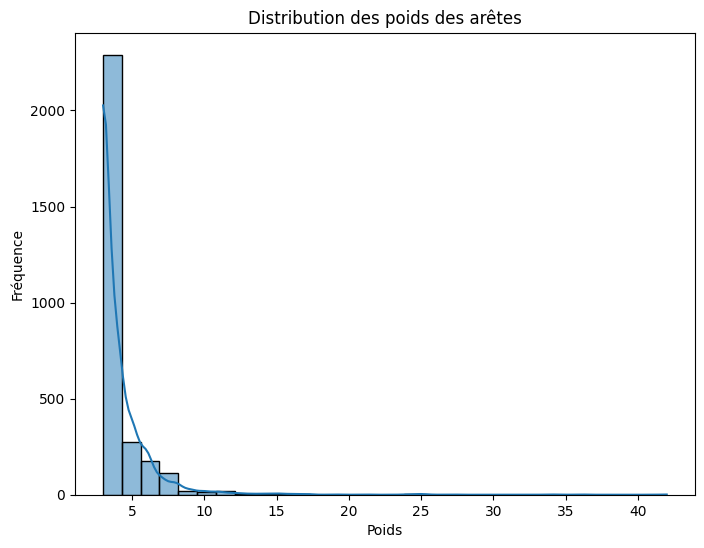

In [44]:
import seaborn as sns
weight_distribution = filtered_edges_df['Weight'].describe()
print("\nStatistiques descriptives des poids des arêtes :")
print(weight_distribution)

# Histogramme des poids des arêtes
plt.figure(figsize=(8,6))
sns.histplot(filtered_edges_df['Weight'], bins=30, kde=True)
plt.title('Distribution des poids des arêtes')
plt.xlabel('Poids')
plt.ylabel('Fréquence')
plt.show()

## Processing des données

In [4]:
import networkx as nx

# Créer un graphe non orienté
G = nx.Graph()

# Ajouter les nœuds : on ne veut ajouter que les acteurs
for index, row in nodes_df.iterrows():
    if row['category'] == 'actor':
        G.add_node(row['Id'], label=row['Label'], category='actor')

# Ajouter les arêtes : lier les acteurs à leurs réalisateurs, puis les relier entre eux
for index, row in edges_df.iterrows():
    source = row['Source']
    target = row['Target']
    movie_id = row['Label']
    
    # On ne veut connecter que les acteurs via les réalisateurs
    if nodes_df[nodes_df['Id'] == source]['category'].values[0] == 'actor' and nodes_df[nodes_df['Id'] == target]['category'].values[0] == 'actor':
        # Ajouter une arête entre les deux acteurs s'ils ont travaillé avec un même réalisateur
        G.add_edge(source, target, movie_id=movie_id, weight=row['Weight'])


KeyboardInterrupt: 

In [1]:
# Extraire les nœuds du graphe sous forme de DataFrame
actor_nodes = pd.DataFrame({
    'Id': list(G.nodes),
    'Label': [G.nodes[node]['label'] for node in G.nodes],
    'Category': ['actor'] * len(G.nodes)
})

# Exporter en CSV
actor_nodes.to_csv('gephi/actor_realisator_nodes.csv', index=False)


NameError: name 'pd' is not defined

In [ ]:
# Extraire les arêtes du graphe sous forme de DataFrame
edges_list = []
for source, target, data in G.edges(data=True):
    edges_list.append([source, target, data['weight']])

actor_edges = pd.DataFrame(edges_list, columns=['Source', 'Target', 'Weight'])

# Exporter en CSV
actor_edges.to_csv('gephi/actor_realisator_edges.csv', index=False)
